In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [71]:
df_exploded = df.explode('job_skills')

In [72]:
skills_count = df_exploded.groupby(['job_skills','job_title_short']).size()

In [73]:
skills_count = skills_count.reset_index(name='Skills count')

skills_count = skills_count.sort_values('Skills count',ascending=False)

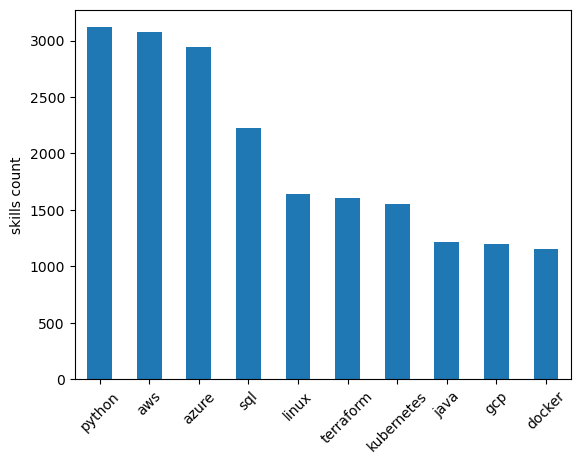

In [88]:
job = 'Cloud Engineer'
quantity = 10

skills_count_final = skills_count[skills_count['job_title_short'] == job].head(quantity)

skills_count_final.plot(kind='bar',x='job_skills',y='Skills count')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('skills count')
plt.legend().set_visible(False)
plt.show()

In [84]:
skills_count_final

,job_skills,job_title_short,Skills count
1477,python,Cloud Engineer,3116
139,aws,Cloud Engineer,3075
149,azure,Cloud Engineer,2943
1820,sql,Cloud Engineer,2227
975,linux,Cloud Engineer,1637
1970,terraform,Cloud Engineer,1607
950,kubernetes,Cloud Engineer,1554
844,java,Cloud Engineer,1217
668,gcp,Cloud Engineer,1200
477,docker,Cloud Engineer,1152


In [75]:
skills_count

,job_skills,job_title_short,Skills count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [109]:
skills_salary = df_exploded.pivot_table(index='job_skills',values='salary_year_avg',aggfunc='median').sort_values(by='salary_year_avg',ascending=False)

skills_salary = skills_salary.reset_index()


NameError: name 'isany' is not defined

In [105]:
skills_salary.reset_index()

,job_skills,salary_year_avg
0,debian,196500.0
1,ringcentral,182500.0
2,mongo,173500.0
3,lua,170500.0
4,hugging face,157500.0
5,dplyr,157500.0
6,haskell,157500.0
7,watson,157500.0
8,asp.net core,155000.0
9,solidity,152500.0
